## The Mission
The real estate company Immo Eliza asked you to create a machine learning model to predict prices of real estate properties in Belgium.

After the scraping, cleaning and analyzing, you are ready to preprocess the data and finally build a performant machine learning model!


### All imported packages that will be used for this project


In [416]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [417]:
def handling_csv():
    df = pd.read_csv("./data/clean_data/final_cleaned_data.csv")
    df['state_of_building'] = df['state_of_building'].astype('category')

    return df

df = handling_csv()

In [418]:
# Overview of all the columns and the total missing values per column
def overview_function():
    df = handling_csv()
    print(df.dtypes)
    print(df.isna().sum())
    return df

df = overview_function()

property_ID                        object
locality_name                      object
postal_code                         int64
type                               object
subtype                            object
price (€)                           int64
number_of_bedrooms                float64
living_area (m²)                    int64
equiped_kitchen (yes:1, no:0)       int64
furnished (yes:1, no:0)             int64
open_fire (yes:1, no:0)             int64
terrace (yes:1, no:0)               int64
terrace_area (m²)                 float64
garden (yes:1, no:0)                int64
number_facades                    float64
swimming_pool (yes:1, no:0)         int64
state_of_building                category
province                           object
dtype: object
property_ID                         0
locality_name                    2328
postal_code                         0
type                                0
subtype                             0
price (€)                           0
nu

### Traint test split --> imputing --> encoding --> scaling

Scaling before splitting can lead to: Data Leakage. Therefore, it is important to follow the path indicated above. 


### 1. Train_test_split

In [419]:
# The variable `y` is the variable that must be regressed. The target to be predicted.
# The variable `X` which will be the explanatory variable. The feature.

def train_test_split():
    from sklearn.model_selection import train_test_split
    import pandas as pd
    
    df = handling_csv()
    df = df.reset_index(drop=True)
    # Columns to drop
    columns_to_drop = ["price (€)", "property_ID", "locality_name", "postal_code"]

    X = df.drop(columns=columns_to_drop)
    X_train_cols = X.columns.tolist()
    X = X.to_numpy()
    y = df['price (€)'].to_numpy()

    # print("X shape: ", X.shape)
    # print("y shape: ", y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Data type of y_train: {type(X_train)}")
    print(f"Data type of y_train: {type(X_test)}")

    X_train = pd.DataFrame(X_train, columns=X_train_cols).reset_index(drop=True)
    X_test = pd.DataFrame(X_test, columns=X_train_cols).reset_index(drop=True)


    print(f"Data type of y_train: {type(X_train)}")
    print(f"Data type of y_train: {type(X_test)}")
    # print("X_train shape:", X_train.shape)
    # print("X_test shape:", X_test.shape)
    # print("y_train shape:", y_train.shape)
    # print("y_test shape:", y_test.shape)

    return X_train, X_test, y_train, y_test, X_train_cols
 
X_train, X_test, y_train, y_test, X_train_cols = train_test_split()
display(X_train.head())


Data type of y_train: <class 'numpy.ndarray'>
Data type of y_train: <class 'numpy.ndarray'>
Data type of y_train: <class 'pandas.core.frame.DataFrame'>
Data type of y_train: <class 'pandas.core.frame.DataFrame'>


,type,subtype,number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building,province
0,Apartment,Studio,NaN,12,1,0,0,0,NaN,0,4.0,0,New,Brussels
1,Apartment,Apartment,1.0,73,0,0,0,1,24.0,0,NaN,0,New,Luxembourg
2,Apartment,Duplex,2.0,102,1,0,0,1,NaN,0,NaN,0,Normal,Brabant-Wallon
3,Apartment,Apartment,3.0,114,1,0,0,1,8.0,1,3.0,0,New,Brussels
4,Apartment,Apartment,2.0,93,1,0,0,1,11.0,0,4.0,0,New,Antwerp


### Relationship between variables

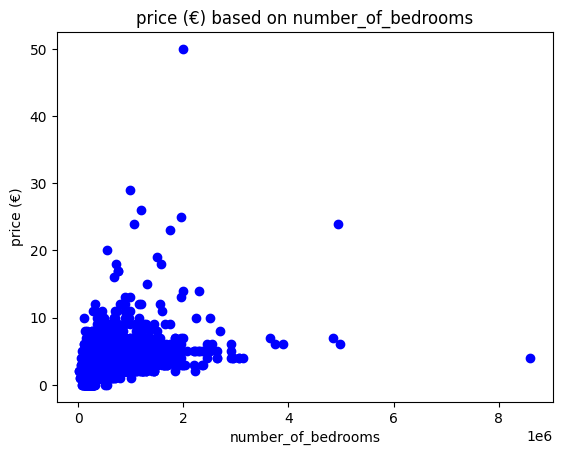

In [420]:
plt.scatter(df['price (€)'], df['number_of_bedrooms'], color = 'blue')
plt.xlabel('number_of_bedrooms')
plt.ylabel('price (€)')
plt.title('price (€) based on number_of_bedrooms')
plt.show()


### 2. Imputation

Sart with a SimpleImputer and continue with more difficult to get better results (Optional). 

In [ ]:
def imputation(X_train: pd.DataFrame, X_test: pd.DataFrame):
    from sklearn.impute import SimpleImputer
    from sklearn.compose import ColumnTransformer

    # Numerical Imputer   
    # Assigning missing values of 'number_of_bedrooms', 'terrace_area (m²)', 'number_facades' to 0. 
    numerical_cols = ['number_of_bedrooms', 'terrace_area (m²)', 'number_facades']
    numerical_imputer = SimpleImputer(strategy="constant", fill_value=0, add_indicator=False)

    # Categorical Imputer
    # Strategy: Replace NaNs with the most frequent value (mode)
    categorical_cols = ["province", "type"]
    categorical_imputer = SimpleImputer(strategy="most_frequent")

    preprocessor = ColumnTransformer(transformers=[('cat_imputer', categorical_imputer, categorical_cols), ('num_imputer', numerical_imputer, numerical_cols)], remainder='passthrough')
    preprocessor.set_output(transform="pandas")

    # Applying the transformer
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed

X_train_processed, X_test_processed = imputation(X_train, X_test)
display(X_train_processed.head())


AttributeError: 'numpy.ndarray' object has no attribute 'head'

### 3. Encoding : converting categorical data into numeric features using **one-hot encoding**

One-Hot Encoding will be used for "province" and "type" columns, as we have less than 10 different categories in each of these columns.

In [ ]:
def encoding_ohe(X_train, X_test):
    from sklearn.preprocessing import OneHotEncoder
    import pandas as pd

    ohe_cols = ["cat_imputer__province", "cat_imputer__type"]
    one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

    # fit only on train to prevent data leakage
    type_train = one_hot_encoder.fit_transform(X_train[ohe_cols])
    type_test = one_hot_encoder.transform(X_test[ohe_cols])

    feature_names = one_hot_encoder.get_feature_names_out(ohe_cols)

    # convert the encoded arrays back into DataFrames
    type_train_df = pd.DataFrame(type_train, columns=feature_names, index=X_train.index)
    type_test_df = pd.DataFrame(type_test, columns=feature_names, index=X_test.index)

    # pd. concat([df1, df2], axis=1) joins DataFrames column-wise, aligning rows by index
    X_train = pd.concat([X_train.drop(columns=ohe_cols), type_train_df], axis=1)
    X_test = pd.concat([X_test.drop(columns=ohe_cols), type_test_df], axis=1)

    return X_train, X_test

X_train_imputed, X_test_imputed = imputation(X_train, X_test)
X_train_final, X_test_final = encoding_ohe(X_train_imputed, X_test_imputed)
display(X_train_final.head())


,num_imputer__number_of_bedrooms,num_imputer__terrace_area (m²),num_imputer__number_facades,remainder__subtype,remainder__living_area (m²),"remainder__equiped_kitchen (yes:1, no:0)","remainder__furnished (yes:1, no:0)","remainder__open_fire (yes:1, no:0)","remainder__terrace (yes:1, no:0)","remainder__garden (yes:1, no:0)",...,cat_imputer__province_East-Flanders,cat_imputer__province_Flemish-Brabant,cat_imputer__province_Hainaut,cat_imputer__province_Limburg,cat_imputer__province_Liège,cat_imputer__province_Luxembourg,cat_imputer__province_Namur,cat_imputer__province_West-Flanders,cat_imputer__type_Apartment,cat_imputer__type_House
0,0,0,4.0,Studio,12,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,24.0,0,Apartment,73,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,0,0,Duplex,102,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,8.0,3.0,Apartment,114,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,11.0,4.0,Apartment,93,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Ordinal Encoder will be used for 'state of building' column, as this column has more than 10 different categories.

In [ ]:
def target_encoder_state(X_train, X_test, y_train):
    from sklearn.preprocessing import TargetEncoder
    import pandas as pd
    
    X_train_clean = X_train.copy()
    X_test_clean = X_test.copy()

    # This function returns a 1D array that contains the input elements
    y_train_1D = y_train.ravel()

    target_encoder = TargetEncoder(random_state=42)

    encoded_train = target_encoder.fit_transform(X_train_clean[["state_of_building"]], y_train_1D)
    encoded_test = target_encoder.transform(X_test_clean[["state_of_building"]])

    encoded_train_df = pd.DataFrame(encoded_train[:, 0], columns=["state_of_building_TE"], index=X_train_clean.index)
    encoded_test_df = pd.DataFrame(encoded_test[:, 0], columns=["state_of_building_TE"], index=X_test_clean.index)

    X_train_clean = pd.concat([X_train_clean, encoded_train_df], axis=1)
    X_test_clean = pd.concat([X_test_clean, encoded_test_df], axis=1)

    X_train_clean = X_train_clean.drop("state_of_building", axis=1)
    X_test_clean = X_test_clean.drop("state_of_building", axis=1)

    return X_train_clean, X_test_clean

X_train_imputed, X_test_imputed = imputation(X_train, X_test)
X_train_ohe, X_test_ohe = encoding_ohe(X_train_imputed, X_test_imputed)
X_train_target, X_test_target = target_encoder_state(X_train_ohe, X_test_ohe, y_train) 

display(X_train_target.head())

KeyError: "None of [Index(['state_of_building'], dtype='object')] are in the [columns]"

Ordinal Encoder will also be used for 'subtype' column, as this column has around 10 different categories.

In [ ]:
def target_encoder_subtype(X_train, X_test, y_train):
    from sklearn.preprocessing import TargetEncoder
    import pandas as pd
    
    X_train_clean_1 = X_train.copy()
    X_test_clean_1 = X_test.copy()

    # This function returns a 1D array that contains the input elements
    y_train_1D = y_train.ravel()
    target_encoder = TargetEncoder(random_state=42)

    encoded_train = target_encoder.fit_transform(X_train_clean_1[["subtype"]], y_train_1D)
    encoded_test = target_encoder.transform(X_test_clean_1[["subtype"]])

    encoded_train_df = pd.DataFrame(encoded_train[:, 0], columns=["subtype_TE"], index=X_train_clean_1.index)
    encoded_test_df = pd.DataFrame(encoded_test[:, 0], columns=["subtype_TE"], index=X_test_clean_1.index)

    X_train_clean_1 = pd.concat([X_train_clean_1, encoded_train_df], axis=1)
    X_test_clean_1 = pd.concat([X_test_clean_1, encoded_test_df], axis=1)

    X_train_clean_1 = X_train_clean_1.drop("subtype", axis=1)
    X_test_clean_1 = X_test_clean_1.drop("subtype", axis=1)

    return X_train_clean_1, X_test_clean_1

X_train_with_state, X_test_with_state = target_encoder_state(X_train, X_test, y_train)
X_train_final_encoded, X_test_final_encoded = target_encoder_subtype(X_train_with_state, X_test_with_state, y_train)

display(X_train_final_encoded.head())

c:\Repositories\immo-eliza-ml\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Repositories\immo-eliza-ml\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,type,number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",province,state_of_building_TE,subtype_TE
0,Apartment,NaN,12,1,0,0,0,NaN,0,4.0,0,Brussels,0.0,0.0
1,Apartment,1.0,73,0,0,0,1,24.0,0,NaN,0,Luxembourg,0.0,0.0
2,Apartment,2.0,102,1,0,0,1,NaN,0,NaN,0,Brabant-Wallon,0.0,0.0
3,Apartment,3.0,114,1,0,0,1,8.0,1,3.0,0,Brussels,0.0,0.0
4,Apartment,2.0,93,1,0,0,1,11.0,0,4.0,0,Antwerp,0.0,0.0


Scaling

In [ ]:
def scale_numeric(X_train, X_val, X_test, numeric_cols):
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()

    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

    return X_train, X_val, X_test, scaler

In [ ]:
# numeric_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median', add_indicator=True)), ('cap',capper), ('scaler', StandardScaler())])